In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_scores_pastyear=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
previous_year_precip=pd.DataFrame(precip_scores_pastyear, columns=['Date', 'Precip Amount'])
# Sort the dataframe by date

previous_year_precip.sort_values('Date')
previous_year_precip.head()

,Date,Precip Amount
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


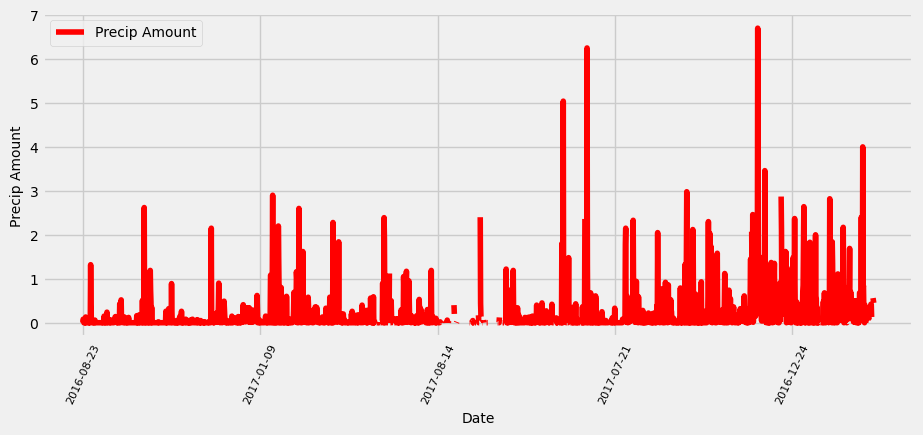

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
previous_year_precip.plot(x="Date", y='Precip Amount', rot=65, figsize=(10,4), color="red")
plt.xlabel("Date", fontsize=10)
plt.ylabel("Precip Amount", fontsize=10)
plt.xticks(rotation=65, fontsize=8)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
previous_year_precip.describe()

,Precip Amount
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(Station.id).count()
total_stations

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations=session.query(func.count(Measurement.station),Measurement.station).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel=[Measurement.station,
     func.min(Measurement.tobs),
     func.max(Measurement.tobs),
     func.avg(Measurement.tobs)]
most_active_station=session.query(*sel).\
    filter(Measurement.station=='USC00519281').all()
most_active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [18]:
most_recent_date_station=session.query(Measurement.date).\
    filter(Measurement.station=='USC00519281').\
    order_by(Measurement.date.desc()).first()
most_recent_date_station

('2017-08-18',)

In [27]:
# Calculate the date one year from the last date in data set.
most_recent_date_station=session.query(Measurement.date).\
    filter(Measurement.station=='USC00519281').\
    order_by(Measurement.date.desc()).first()
most_recent_date_station

previous_year_station=dt.date(2017,8,18)-dt.timedelta(days=365)

temps_pastyear_station=session.query(Measurement.station,Measurement.tobs).filter(Measurement.date >= previous_year_station).\
    filter(Measurement.station=='USC00519281').\
    order_by(Measurement.tobs.desc()).all()

# Save the query results as a Pandas DataFrame.
prevyear_station=pd.DataFrame(temps_pastyear_station, columns=['Station','Temp Obs'])
prevyear_station.head()

,Station,Temp Obs
0,USC00519281,83.0
1,USC00519281,82.0
2,USC00519281,82.0
3,USC00519281,82.0
4,USC00519281,81.0


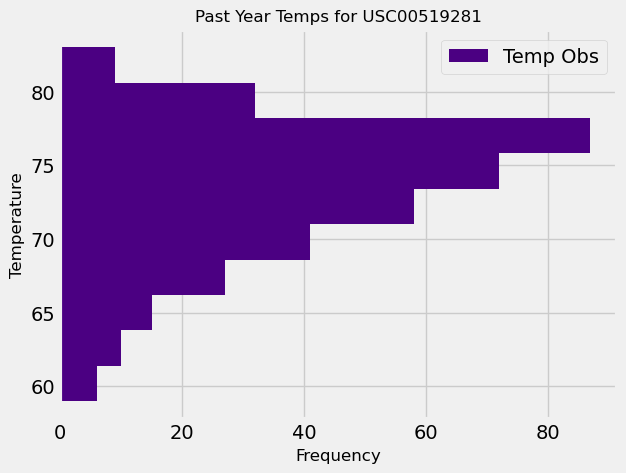

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

prevyear_station.plot(kind='hist', color='indigo', orientation='horizontal')

plt.title('Past Year Temps for USC00519281', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()